In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
#use for background image, if applicable
import matplotlib.image as mpimg

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
latest = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"Latest: {latest[0]}")

Latest: 2017-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores
last_twelve = engine.execute('SELECT date, prcp AS precipitation FROM measurement WHERE date >= "2016-08-23"').fetchall()
# Preview the Data
df = pd.DataFrame(last_twelve, columns=['date', 'precipitation'])
# Save the query results as a Pandas DataFrame and set the index to the date column
date_df = df.set_index(['date'])
# Sort the dataframe by date
last_twelve_df = date_df.sort_values(by=['date'], ascending=True)
#drop 'none' values
clean_df = last_twelve_df.dropna(how='any')
clean_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


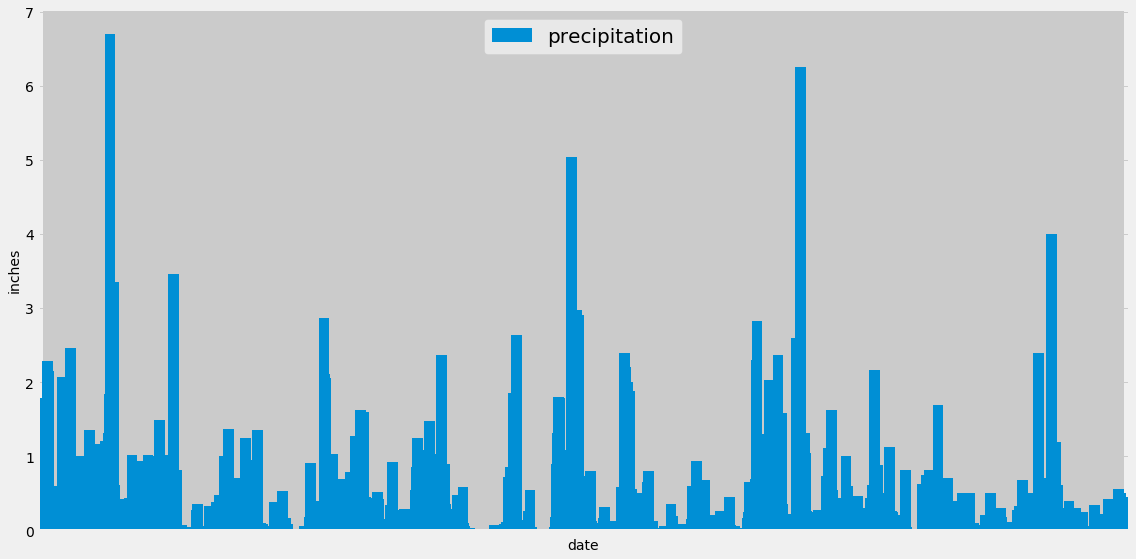

In [48]:
# Use Pandas Plotting with Matplotlib to plot the data
ax= clean_df.plot.bar(figsize=(16,8), width=20)
ax.set_xlabel("date", fontsize=14)
ax.set_ylabel("inches", fontsize=14)
ax.set_xticklabels([])
plt.legend(['precipitation'], fontsize=20)
ax.get_legend().set_bbox_to_anchor((0.6, 1))
plt.tight_layout()
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(station.id)).first()
station_count

(9)

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).\
                               group_by(measurement.station).\
                               order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
first_station = session.query(measurement.station).group_by(measurement.station).\
                               order_by(func.count(measurement.station).desc()).first()
first_station

('USC00519281')

In [18]:
session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station=='USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [32]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data =  session.query(measurement.date,measurement.tobs).\
                    filter(measurement.station == 'USC00519281').\
                    filter(measurement.date > '2016-08-23').all()
tobs_data[:10]

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0)]

In [33]:
tobs_df = pd.DataFrame(tobs_data, columns=['date', 'tobs'])

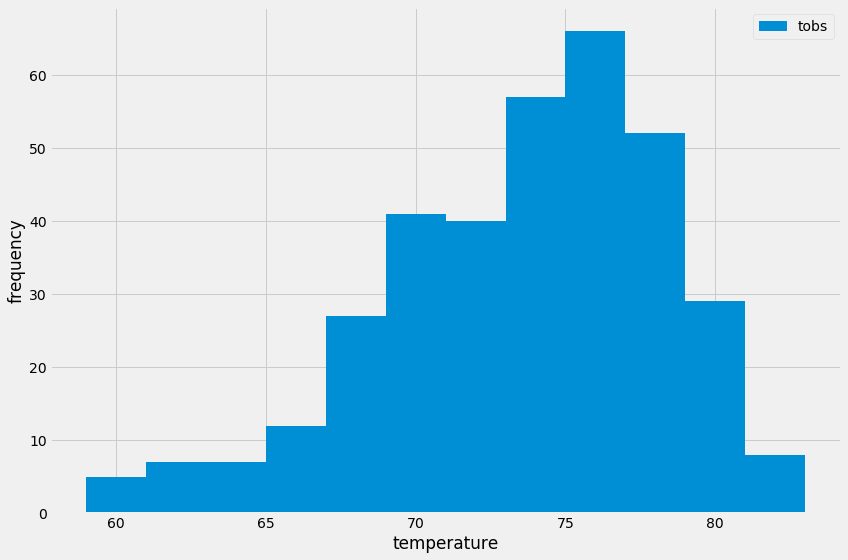

In [42]:
plt.figure(figsize=(12,8))
plt.hist(tobs_df["tobs"], bins=12)
plt.ylabel("frequency")
plt.xlabel("temperature")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()